In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
building3 = pd.read_csv("building 3.csv")

In [3]:
building3

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,3,1321.0,2016-03-01 05:00:00,2016,3,1,5,0,Building3
1,7,1293.0,2016-03-01 06:00:00,2016,3,1,6,0,Building3
2,11,1249.0,2016-03-01 07:00:00,2016,3,1,7,0,Building3
3,15,1125.0,2016-03-01 08:00:00,2016,3,1,8,0,Building3
4,19,693.0,2016-03-01 09:00:00,2016,3,1,9,0,Building3
...,...,...,...,...,...,...,...,...,...
40795,163739,243.0,2020-10-31 19:00:00,2020,10,31,19,0,Building3
40796,163743,245.0,2020-10-31 20:00:00,2020,10,31,20,0,Building3
40797,163747,341.0,2020-10-31 21:00:00,2020,10,31,21,0,Building3
40798,163751,320.0,2020-10-31 22:00:00,2020,10,31,22,0,Building3


In [4]:
building3['datetime']=pd.to_datetime(building3['datetime'], format='%Y-%m-%d %H:%M:%S')

building3= building3.set_index('datetime')

building3= building3.asfreq('H')

<AxesSubplot:xlabel='datetime'>

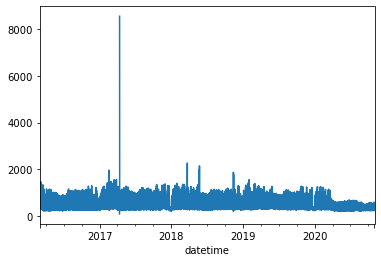

In [5]:
building3["series_value"].plot()

In [6]:
end_train='2019-12-31 23:00'

start_test='2020-01-01 00:00'

building3train = building3.loc[:end_train,:]

building3test=building3.loc[start_test:, :]

In [7]:
building3train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2016-03-01 05:00:00,3.0,1321.0,2016.0,3.0,1.0,5.0,0.0,Building3
2016-03-01 06:00:00,7.0,1293.0,2016.0,3.0,1.0,6.0,0.0,Building3
2016-03-01 07:00:00,11.0,1249.0,2016.0,3.0,1.0,7.0,0.0,Building3
2016-03-01 08:00:00,15.0,1125.0,2016.0,3.0,1.0,8.0,0.0,Building3
2016-03-01 09:00:00,19.0,693.0,2016.0,3.0,1.0,9.0,0.0,Building3
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,134459.0,232.0,2019.0,12.0,31.0,19.0,0.0,Building3
2019-12-31 20:00:00,134463.0,222.0,2019.0,12.0,31.0,20.0,0.0,Building3
2019-12-31 21:00:00,134467.0,227.0,2019.0,12.0,31.0,21.0,0.0,Building3


In [8]:
building3test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-01-01 00:00:00,134479.0,256.0,2020.0,1.0,1.0,0.0,0.0,Building3
2020-01-01 01:00:00,134483.0,273.0,2020.0,1.0,1.0,1.0,0.0,Building3
2020-01-01 02:00:00,134487.0,289.0,2020.0,1.0,1.0,2.0,0.0,Building3
2020-01-01 03:00:00,134491.0,313.0,2020.0,1.0,1.0,3.0,0.0,Building3
2020-01-01 04:00:00,134495.0,299.0,2020.0,1.0,1.0,4.0,0.0,Building3
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,163739.0,243.0,2020.0,10.0,31.0,19.0,0.0,Building3
2020-10-31 20:00:00,163743.0,245.0,2020.0,10.0,31.0,20.0,0.0,Building3
2020-10-31 21:00:00,163747.0,341.0,2020.0,10.0,31.0,21.0,0.0,Building3


In [9]:
train_b3 = building3train.reset_index()[["datetime","series_value"]]
train_b3.columns=["ds","y"]
train_b3

,ds,y
0,2016-03-01 05:00:00,1321.0
1,2016-03-01 06:00:00,1293.0
2,2016-03-01 07:00:00,1249.0
3,2016-03-01 08:00:00,1125.0
4,2016-03-01 09:00:00,693.0
...,...,...
33614,2019-12-31 19:00:00,232.0
33615,2019-12-31 20:00:00,222.0
33616,2019-12-31 21:00:00,227.0
33617,2019-12-31 22:00:00,245.0


In [10]:
model_b3 = Prophet()
model_b3.fit(train_b3)

In [11]:
future_b3 = model_b3.make_future_dataframe(periods=7320,freq="H")
#future_b3 #40939
#building3 #40939

In [12]:
forecast_b3 = model_b3.predict(future_b3)

In [13]:
forecast_b3
#forecast_b3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-01 05:00:00,519.209865,767.623088,1151.144862,519.209865,519.209865,444.301106,444.301106,444.301106,272.119510,...,78.954682,78.954682,78.954682,93.226914,93.226914,93.226914,0.0,0.0,0.0,963.510971
1,2016-03-01 06:00:00,519.175842,769.129547,1135.303884,519.175842,519.175842,424.018145,424.018145,424.018145,252.658401,...,77.946835,77.946835,77.946835,93.412909,93.412909,93.412909,0.0,0.0,0.0,943.193988
2,2016-03-01 07:00:00,519.141820,712.621122,1090.288427,519.141820,519.141820,373.038760,373.038760,373.038760,202.372421,...,77.069146,77.069146,77.069146,93.597193,93.597193,93.597193,0.0,0.0,0.0,892.180580
3,2016-03-01 08:00:00,519.107797,628.950110,1014.450902,519.107797,519.107797,298.161033,298.161033,298.161033,128.048810,...,76.332460,76.332460,76.332460,93.779762,93.779762,93.779762,0.0,0.0,0.0,817.268829
4,2016-03-01 09:00:00,519.073774,544.397105,919.151681,519.073774,519.073774,215.266079,215.266079,215.266079,45.561086,...,75.744383,75.744383,75.744383,93.960610,93.960610,93.960610,0.0,0.0,0.0,734.339853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40934,2020-10-31 19:00:00,456.754500,-260.818526,265.326749,261.905642,638.329069,-457.073738,-457.073738,-457.073738,-235.383896,...,-250.078959,-250.078959,-250.078959,28.389117,28.389117,28.389117,0.0,0.0,0.0,-0.319238
40935,2020-10-31 20:00:00,456.747167,-230.306075,324.093351,261.854084,638.351282,-414.787542,-414.787542,-414.787542,-196.029099,...,-246.974124,-246.974124,-246.974124,28.215681,28.215681,28.215681,0.0,0.0,0.0,41.959625
40936,2020-10-31 21:00:00,456.739834,-158.944938,413.376427,261.802527,638.373402,-328.970436,-328.970436,-328.970436,-114.098652,...,-242.913664,-242.913664,-242.913664,28.041880,28.041880,28.041880,0.0,0.0,0.0,127.769398
40937,2020-10-31 22:00:00,456.732500,-26.625905,513.130232,261.750970,638.395521,-211.489428,-211.489428,-211.489428,-1.434090,...,-237.923059,-237.923059,-237.923059,27.867721,27.867721,27.867721,0.0,0.0,0.0,245.243072


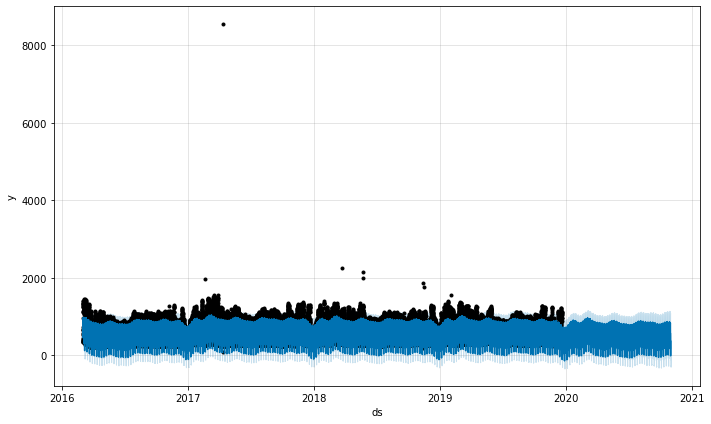

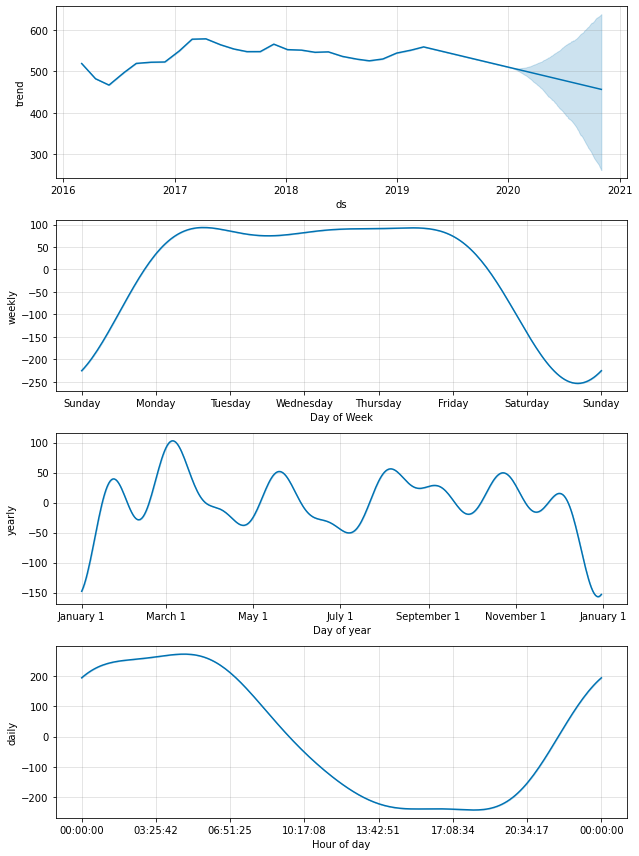

In [14]:
# plot the prediction 
fig= model_b3.plot(forecast_b3)
#plot predictions 
fig= model_b3.plot_components(forecast_b3)

In [15]:
forecast_b3["additive_terms"]
additive_terms =  pd.DataFrame(forecast_b3["additive_terms"])
additive_terms

,additive_terms
0,444.301106
1,424.018145
2,373.038760
3,298.161033
4,215.266079
...,...
40934,-457.073738
40935,-414.787542
40936,-328.970436
40937,-211.489428


In [16]:
building3["series_value"]
actual_value = pd.DataFrame(building3.reset_index()["series_value"])
actual_value

,series_value
0,1321.0
1,1293.0
2,1249.0
3,1125.0
4,693.0
...,...
40934,243.0
40935,245.0
40936,341.0
40937,320.0


In [17]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(building3.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_b3["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 
#sub

,datetime,subtraction,additive_terms,actual_value
0,2016-03-01 05:00:00,876.698894,444.301106,1321.0
1,2016-03-01 06:00:00,868.981855,424.018145,1293.0
2,2016-03-01 07:00:00,875.961240,373.038760,1249.0
3,2016-03-01 08:00:00,826.838967,298.161033,1125.0
4,2016-03-01 09:00:00,477.733921,215.266079,693.0
...,...,...,...,...
40934,2020-10-31 19:00:00,700.073738,-457.073738,243.0
40935,2020-10-31 20:00:00,659.787542,-414.787542,245.0
40936,2020-10-31 21:00:00,669.970436,-328.970436,341.0
40937,2020-10-31 22:00:00,531.489428,-211.489428,320.0


In [18]:
output.to_csv("b3_actual_additive.csv",index=False)